**Training and Test**
<p>Some data has be preprocessed (i.e. cleaned) and the next step is to build a model using the data. </p>
<p>After building the model, we test it using different data sets and measure it's performance (i.e. accuracy)</p>
We will try the following:
<li>Linear Regression</li>
<li>Neural Network</li>

In [19]:
# importing the libraries
import pandas as pd # for reading csv
import matplotlib.pyplot as plt #for plotting graphs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df=pd.read_csv('Clean_Dataset.csv', na_values=['NA','?']) #ignore missing values
# Dropping column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

encoder=LabelEncoder() #convert txt data to numeric
for col in df.columns:
    if df[col].dtype=='object': # no need to convert duration, days_left, and price columns
        df[col]=encoder.fit_transform(df[col])

price = df['price'] # target
features = df.drop('price',axis=1) #data features

#splitting the data
xtrain,xtest,ytrain,ytest=train_test_split(features,price,test_size=0.30,random_state=42)
print("Sample in test set ",xtest.shape[0])
print("Sample in train set ",xtrain.shape[0])
xtrain.head()

Sample in test set  90046
Sample in train set  210107


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
2406,5,1516,2,5,0,4,5,1,13.42,14
275865,5,1518,3,4,0,2,2,0,9.58,23
297156,5,1486,1,1,0,2,4,0,11.17,29
12826,5,1546,2,2,0,5,0,1,5.08,16
93166,2,1122,0,4,0,5,2,1,12.58,45


<h2>Linear Regression</h2>
<li>Training and Testing LinearRegression (<b>without scaling</b> or normalizing data)</li>

Root Mean Squared Error: 7004.431179591318


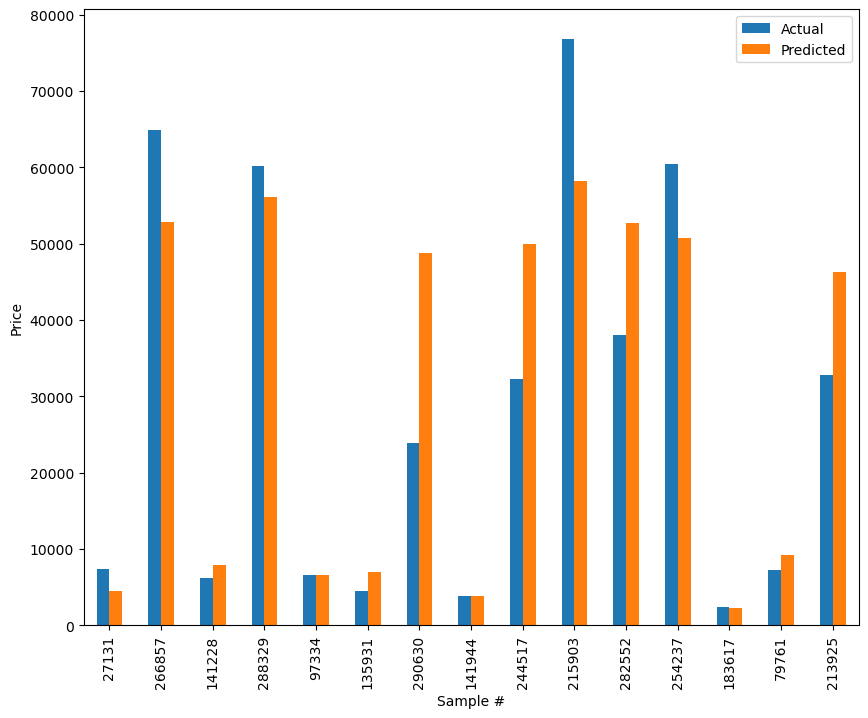

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

models = LinearRegression()
models.fit(xtrain, ytrain)    
# Predict the model with test data
ypred = models.predict(xtest)
# Evaluation metrics for Regression analysis
df_compare = pd.DataFrame({'Actual': ytest, 'Predicted': ypred}).head(15)
df_compare.plot(kind='bar',figsize=(10,8),xlabel="Sample #",ylabel="Price")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred))) # Not good enough

<li>Training and Testing LinearRegression after <b>Min Max Scalar</b></li>

Root Mean Squared Error: 7005.015436429297


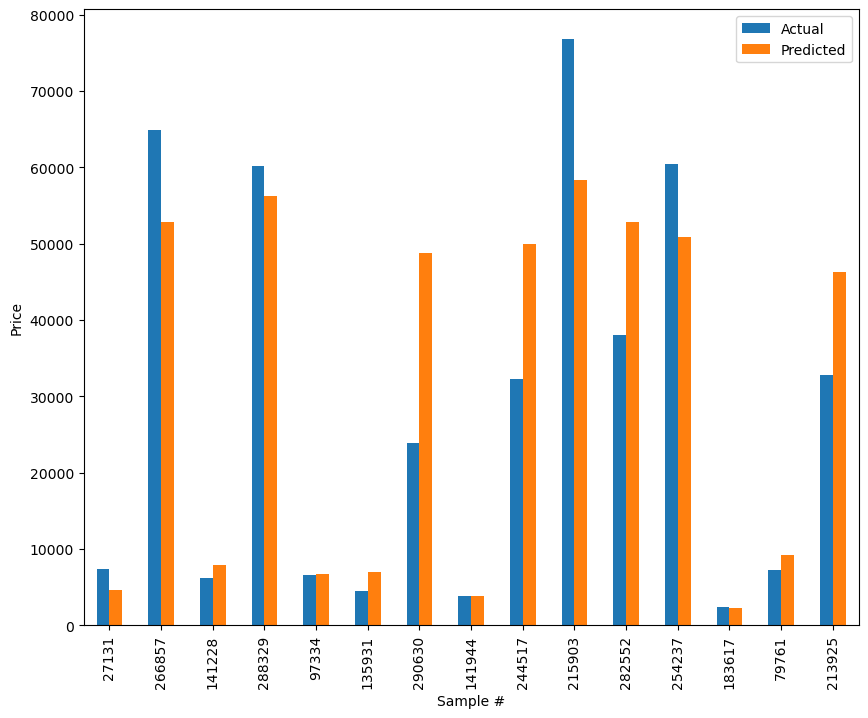

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1)) # It's good to scale the values between 0 and 1
xtrain_mm=pd.DataFrame(mmscaler.fit_transform(xtrain))
xtest_mm=pd.DataFrame(mmscaler.fit_transform(xtest))  
xtrain_mm.head()

models = LinearRegression()
models.fit(xtrain_mm, ytrain)    
# Predict the model with test data
ypred = models.predict(xtest_mm)
# Evaluation metrics for Regression analysis
df_compare = pd.DataFrame({'Actual': ytest, 'Predicted': ypred}).head(15)
df_compare.plot(kind='bar',figsize=(10,8),xlabel="Sample #",ylabel="Price")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred))) # Not good enough

<li>Training and Tesing LinearRegression after <b>Standard Scalar</b></li>

Root Mean Squared Error: 7004.385201827518


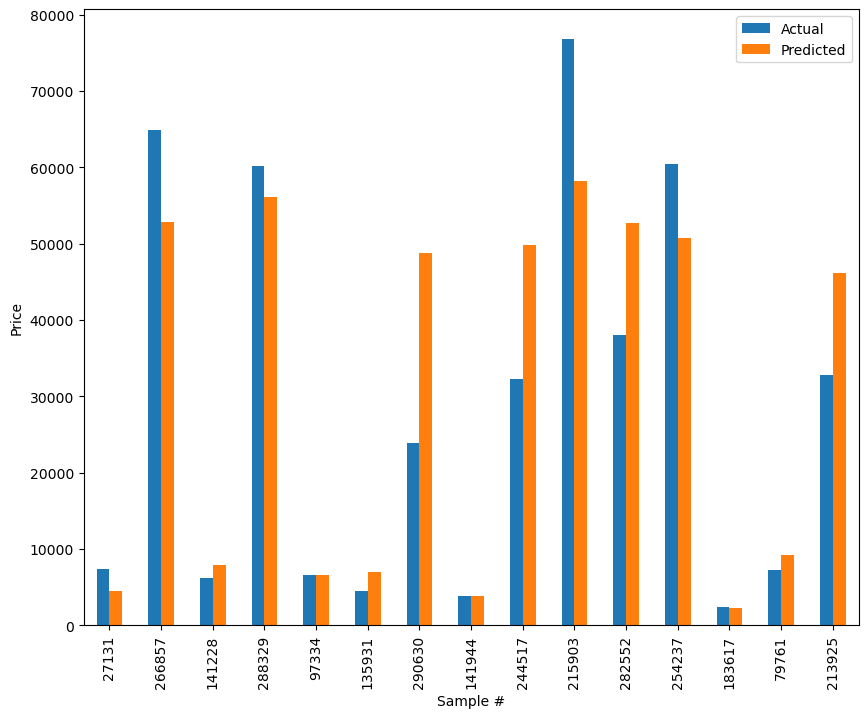

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrain_sc = pd.DataFrame(sc.transform(xtrain))
sc.fit(xtest)
xtest_sc = pd.DataFrame(sc.transform(xtest))

models = LinearRegression()
models.fit(xtrain_sc, ytrain)    
# Predict the model with test data
ypred = models.predict(xtest_sc)
# Evaluation metrics for Regression analysis
df_compare = pd.DataFrame({'Actual': ytest, 'Predicted': ypred}).head(15)
df_compare.plot(kind='bar',figsize=(10,8),xlabel="Sample #",ylabel="Price")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred))) # Not good enough

<h2>Neural Network</h2>
<li>Sequential</li>

In [23]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1)) # It's good to scale the values between 0 and 1
xtrain_mm=pd.DataFrame(mmscaler.fit_transform(xtrain))
xtest_mm=pd.DataFrame(mmscaler.fit_transform(xtest))  
xtrain.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
2406,5,1516,2,5,0,4,5,1,13.42,14
275865,5,1518,3,4,0,2,2,0,9.58,23
297156,5,1486,1,1,0,2,4,0,11.17,29
12826,5,1546,2,2,0,5,0,1,5.08,16
93166,2,1122,0,4,0,5,2,1,12.58,45


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
import numpy as np

model = Sequential()
model.add(Dense(10, input_dim=xtrain.shape[1], activation='relu')) #10 features
model.add(Dense(1,activation='softmax'))#one output
model.compile(loss='categorical_crossentropy', optimizer='adam')
# model.summary()
model.fit(xtrain,ytrain,verbose=1,epochs=2)#only 2 two epochs
ypred = model.predict(xtest)
# Evaluation metrics for Regression analysis
# df_compare = pd.DataFrame({'Actual': ytest, 'Predicted': ypred[0]}).head(15)
# df_compare.plot(kind='bar',figsize=(10,8),xlabel="Sample #",ylabel="Price")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred))) # Not good enough

Epoch 1/2
6566/6566 [==============================] - 21s 3ms/step - loss: 0.0000e+00
Epoch 2/2
2814/2814 [==============================] - 10s 3ms/step
Root Mean Squared Error: 30828.389539689964
